# Social Impact Theory with Twitter Data
## Tasks
In this assignment you will do the following tasks:

1. Construct the timelines of Twitter users
2. Visualize distributions and scatter plots
3. Fit and visualize a regression model
4. Bootstrapping

### Install requirements. 

The following cell contains all the necessary dependencies needed for this task. If you run the cell everything will be installed.  
* [`pandas`](https://pandas.pydata.org/docs/index.html) is a Python package for creating and working with tabular data. [Here](https://pandas.pydata.org/docs/reference/index.html) is the documentation of `pandas`.
* [`numpy`](https://numpy.org/) is a Python package for mathematical functions. [Here](https://numpy.org/doc/stable/reference/index.html) is the documentation of `numpy`.
* [`matplotlib`](https://matplotlib.org/) is a Python package for creating plots. [Here](https://matplotlib.org/stable/api/index.html) is the documentation of `matplotlib`.
* [`scikit-learn`](https://scikit-learn.org/stable/) is a Python package with different machinelearning algorithms. [Here](https://scikit-learn.org/stable/modules/classes.html) is the documentation of `sklearn`.

In [3]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install scikit-learn
! pip install zipfile36 

### Import requirements
The cell below imports all necessary dependancies. Make sure they are installed (see cell above).

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import zipfile # added to open zip-file

# 1 Construct the timelines of Twitter users

## 1.1 Getting a list of users
In this Task choose a list with a few hundred Twitter users, [here](https://docs.google.com/spreadsheets/d/1tcNy1q_eQH3HXGt-0hkmSNEGbcOUiC5si3kZ6-F0pB8/) you can find some example ids of such lists.  
Retrieve all user informations of every user in the list from 'the users.csv' file and save them in a pandas Dataframe. 


In [5]:
# Get list of users from csv
users_list = pd.read_csv("users.csv")
users_list

,username,id,created_at,name,verified,profile_image_url,description,protected,location,url,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count,entities.url.urls,entities.description.hashtags,entities.description.urls,pinned_tweet_id,entities.description.mentions
0,RepConnieConway,1544718378987933703,2022-07-06T16:24:50.000Z,Connie Conway,True,https://pbs.twimg.com/profile_images/155671548...,"Mom, grandmom, wife, daughter of the Central V...",False,"Tulare, CA / Washington, D.C.",https://t.co/Iw5uKMYU4t,220,5,60,7,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...","[{'start': 131, 'end': 136, 'tag': 'CA22'}]",NaN,NaN,NaN
1,repmayraflores,1538990997769707523,2022-06-20T21:07:08.000Z,Congresswoman Mayra Flores,True,https://pbs.twimg.com/profile_images/153941811...,Proudly representing Texas's 34th District in ...,False,NaN,NaN,27800,55,277,48,NaN,NaN,NaN,NaN,NaN
2,CongresswomanSC,1484252226646421505,2022-01-20T19:53:08.000Z,Congresswoman Sheila Cherfilus-McCormick,False,https://pbs.twimg.com/profile_images/149180185...,Congresswoman Sheila Cherfilus-McCormick 📍Prou...,False,"Miramar, FL",https://t.co/wE6d2R5SXn,1005,25,284,36,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...","[{'start': 130, 'end': 150, 'tag': 'workingfor...",NaN,NaN,NaN
3,RepMikeCarey,1457745193197780993,2021-11-08T16:21:58.000Z,Congressman Mike Carey,True,https://pbs.twimg.com/profile_images/146027559...,Congressman Mike Carey. Proudly serving Ohio's...,False,NaN,https://t.co/CnOlkJTpaX,1075,283,907,43,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,"[{'start': 76, 'end': 99, 'url': 'https://t.co...",NaN,NaN
4,RepShontelBrown,1456381091598700556,2021-11-04T22:01:33.000Z,Rep. Shontel Brown,True,https://pbs.twimg.com/profile_images/147075892...,Representative for Ohio’s Eleventh Congression...,False,NaN,https://t.co/v695zCnmxN,32924,348,911,163,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN,1.463532e+18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,SteveDaines,11651202,2007-12-30T05:52:03.000Z,Steve Daines,True,https://pbs.twimg.com/profile_images/146907311...,Serving the people of Montana in the U.S. Sena...,False,"Bozeman, MT",NaN,81287,661,8865,1729,NaN,NaN,NaN,NaN,NaN
550,ChuckGrassley,10615232,2007-11-26T15:17:02.000Z,Chuck Grassley,True,https://pbs.twimg.com/profile_images/921098191...,U.S. Senator. Family farmer. Lifetime resident...,False,Iowa,https://t.co/gGaOVfn75R,742952,12701,11666,6273,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN,NaN,"[{'start': 80, 'end': 94, 'username': 'Grassle..."
551,MarkWarner,7429102,2007-07-12T14:03:33.000Z,Mark Warner,True,https://pbs.twimg.com/profile_images/139693385...,"U.S. Senator from Virginia. \nChairman, Senate...",False,Virginia,https://t.co/sIM9jRW0rP,509595,22966,12925,4931,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN,NaN,NaN
552,JimInhofe,7270292,2007-07-05T14:39:13.000Z,Sen. Jim Inhofe,True,https://pbs.twimg.com/profile_images/124393715...,United States Senator from the great state of ...,False,Oklahoma,https://t.co/qvRXqSkqYw,96383,343,5408,2428,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN,NaN,NaN


From those users we are interested on those who have written at least 100 tweets and that have at least 100 followers. From the remaining set sample 500 at random. Check out pandas conditional indexing [here](https://pandas.pydata.org/pandas-docs/dev/user_guide/indexing.html#boolean-indexing). To randomly get 500 users you can use pandas [`sample`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) method.

In [9]:
# Filter: public_metrics.followers_count >= 100 & public_metrics.tweet_count >= 100
users_filtered = users_list.loc[(users_list["public_metrics.followers_count"] >= 100) & \
  (users_list["public_metrics.tweet_count"] >= 100)] 
# users_filtered = 552 rows × 19 columns

# Get random Sample of 500 users
users_sampled = users_filtered.sample(n=500)
users_sampled

,username,id,created_at,name,verified,profile_image_url,description,protected,location,url,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count,entities.url.urls,entities.description.hashtags,entities.description.urls,pinned_tweet_id,entities.description.mentions
221,RepGarretGraves,2951574214,2014-12-30T17:51:24.000Z,Rep. Garret Graves,True,https://pbs.twimg.com/profile_images/553292029...,Official Twitter Page of Congressman Garret Gr...,False,Follow us on Facebook:,https://t.co/glkM2IIXms,17048,1116,5108,546,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN,1.534562e+18,NaN
283,TXRandy14,1058051748,2013-01-03T15:30:06.000Z,Randy Weber,True,https://pbs.twimg.com/profile_images/616654502...,Representative for the 14th Congressional Dist...,False,"Friendswood, TX",https://t.co/8FFRq1l3TV,23117,763,4139,842,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN,NaN,"[{'start': 70, 'end': 84, 'username': 'reprand..."
163,RepAlLawsonJr,818472418620608512,2017-01-09T15:00:05.000Z,"U.S. Rep. Al Lawson, Jr.",True,https://pbs.twimg.com/profile_images/126826834...,Serving #Florida's Fifth District #ForThePeopl...,False,"Tallahassee — Jacksonville, FL",https://t.co/btx2YIoEdi,16996,1344,2406,558,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...","[{'start': 8, 'end': 16, 'tag': 'Florida'}, {'...",NaN,NaN,"[{'start': 60, 'end': 68, 'username': 'FSCDems..."
95,RepSylviaGarcia,1080587263132733442,2019-01-02T22:10:54.000Z,Rep. Sylvia Garcia,True,https://pbs.twimg.com/profile_images/126892880...,"Member of Congress, TX-29. Includes Houston, G...",False,"Houston, TX",https://t.co/GG5qIK8Oyh,67688,2929,7709,792,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN,NaN,NaN
318,SenFeinstein,476256944,2012-01-27T23:06:59.000Z,Senator Dianne Feinstein,True,https://pbs.twimg.com/profile_images/126999752...,United States Senator from California. On Face...,False,California,https://t.co/nLdPE0lrC6,1494529,260,13834,7051,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,"[{'start': 55, 'end': 78, 'url': 'https://t.co...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,RepMMM,1345807954604412929,2021-01-03T19:03:30.000Z,"Rep. Mariannette Miller-Meeks, M.D.",True,https://pbs.twimg.com/profile_images/148382618...,"Mom, Doctor, Veteran, and Congresswoman proudl...",False,Iowa,https://t.co/bnLnJDJ9bh,12088,303,3001,274,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...","[{'start': 146, 'end': 159, 'tag': 'FightForIo...",NaN,NaN,"[{'start': 91, 'end': 107, 'username': 'HouseV..."
415,NydiaVelazquez,164369297,2010-07-08T18:18:20.000Z,Rep. Nydia Velazquez,True,https://pbs.twimg.com/profile_images/130407152...,Represents New York's 7th Congressional Distri...,False,NYC and DC,https://t.co/Gahd1XU986,80999,6144,11638,1605,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN,NaN,"[{'start': 140, 'end': 154, 'username': 'House..."
123,RepPeteStauber,1075830599007510535,2018-12-20T19:09:37.000Z,Pete Stauber,True,https://pbs.twimg.com/profile_images/108028618...,Proud to represent Minnesota's 8th Congression...,False,"Hermantown, MN",https://t.co/ry2cXXe5MN,10618,417,2282,463,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN,NaN,NaN
550,ChuckGrassley,10615232,2007-11-26T15:17:02.000Z,Chuck Grassley,True,https://pbs.twimg.com/profile_images/921098191...,U.S. Senator. Family farmer. Lifetime resident...,False,Iowa,https://t.co/gGaOVfn75R,742952,12701,11666,6273,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN,NaN,"[{'start': 80, 'end': 94, 'username': 'Grassle..."


## 1.2 Loading timelines

Load the `timeline.csv` file.

In [10]:
# Loading timelines
zip_file = zipfile.ZipFile('timeline.zip')
time_lines =pd.read_csv(zip_file.open("timeline.csv"))
time_lines

,source,lang,id,context_annotations,reply_settings,possibly_sensitive,conversation_id,author_id,text,created_at,...,entities.urls,attachments.media_keys,entities.mentions,referenced_tweets,in_reply_to_user_id,geo.place_id,attachments.poll_ids,withheld.copyright,withheld.country_codes,entities.cashtags
0,Twitter Web App,en,1573010740327219200,"[{'domain': {'id': '10', 'name': 'Person', 'de...",everyone,False,1573010740327219200,84119348,Our transition to #CleanEnergy brings enormous...,2022-09-22T18:06:00.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Twitter Web App,en,1572977602088017921,"[{'domain': {'id': '10', 'name': 'Person', 'de...",everyone,False,1572977602088017921,84119348,"Yesterday, the House voted to protect the inte...",2022-09-22T15:54:19.000Z,...,"[{'start': 195, 'end': 218, 'url': 'https://t....",['3_1572977472639041537'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Twitter Web App,en,1572575623083708417,"[{'domain': {'id': '10', 'name': 'Person', 'de...",everyone,False,1572575623083708417,84119348,"TOMORROW, Thursday, 9/22 at 6PM, I’m joining @...",2022-09-21T13:17:00.000Z,...,"[{'start': 248, 'end': 271, 'url': 'https://t....",['3_1572303931337838595'],"[{'start': 45, 'end': 59, 'username': 'SenGill...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Twitter for iPhone,en,1572271750385209346,"[{'domain': {'id': '10', 'name': 'Person', 'de...",everyone,False,1572271750385209346,84119348,Honored to receive the @HSLegFund 2021 Legisla...,2022-09-20T17:09:31.000Z,...,"[{'start': 209, 'end': 232, 'url': 'https://t....",['3_1572271742344626176'],"[{'start': 23, 'end': 33, 'username': 'HSLegFu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Twitter for iPhone,en,1572242351132913664,"[{'domain': {'id': '10', 'name': 'Person', 'de...",everyone,False,1572242351132913664,84119348,Spread the word🗣📢 It’s #NationalVoterRegistrat...,2022-09-20T15:12:42.000Z,...,"[{'start': 220, 'end': 243, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,Twitter Web App,en,1527699160765546496,"[{'domain': {'id': '10', 'name': 'Person', 'de...",everyone,False,1527699160765546496,993153006,RT @HouseAdmnGOP: 🚨 After the political 1/6 Se...,2022-05-20T17:13:57.000Z,...,NaN,NaN,"[{'start': 3, 'end': 16, 'username': 'HouseAdm...","[{'type': 'retweeted', 'id': '1527698569788018...",NaN,NaN,NaN,NaN,NaN,NaN
19994,Twitter Web App,en,1527690117065891843,"[{'domain': {'id': '10', 'name': 'Person', 'de...",everyone,False,1527690117065891843,993153006,RT @GLFOP: 🚨The violence against law enforceme...,2022-05-20T16:38:01.000Z,...,NaN,NaN,"[{'start': 3, 'end': 9, 'username': 'GLFOP', '...","[{'type': 'retweeted', 'id': '1527075006198448...",NaN,NaN,NaN,NaN,NaN,NaN
19995,Twitter Web App,en,1527358665363439616,"[{'domain': {'id': '10', 'name': 'Person', 'de...",everyone,False,1527358663345655822,993153006,"Fortunately, @RepBost and I were successful in...",2022-05-19T18:40:57.000Z,...,NaN,NaN,"[{'start': 13, 'end': 21, 'username': 'RepBost...","[{'type': 'replied_to', 'id': '152735866334565...",993153006.0,NaN,NaN,NaN,NaN,NaN
19996,Twitter Web App,en,1527358663345655822,"[{'domain': {'id': '10', 'name': 'Person', 'de...",everyone,False,1527358663345655822,993153006,Pritzker and his left-wing allies are already ...,2022-05-19T18:40:56.000Z,...,"[{'start': 278, 'end': 301, 'url': 'https://t....",NaN,NaN,"[{'type': 'quoted', 'id': '1527355720077033472'}]",NaN,NaN,NaN,NaN,NaN,NaN


## 1.3 Aggregating and arranging data
With the timeline retrieved we want to calculate some metrics from the tweets, especially the mean retweet count, which is also often refered as the social impact. For this you can use pandas [`groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) method. Group the data by the `author_id` and calculate the mean of the retweet count of each user.

In [11]:
# Select relevant columns form time lines
time_lines_selected_columns = time_lines[["author_id", "public_metrics.retweet_count"]]

In [12]:
# Group time lines by author
time_lines_grouped = time_lines_selected_columns.groupby(['author_id']).mean()
time_lines_grouped

,public_metrics.retweet_count
author_id,
14984637,272.870
15324851,33.460
15745368,564.705
16256269,22.200
18137749,40.445
...,...
1344750588026900481,127.290
1345103905869455361,40.360
1345787285179162624,199.010


Next we want to merge the users data with the newly created mean retweet informations. For this you have to merge the users dataframe with the just created dataframe with the retweet mean of each user. Use `pandas` [`merge`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) method.    

Afterwards remove all unused columns, at the end the dataframe should contain the author ID, name, the follower count and the mean retweet count. 

Attention: The user id in the timeline dataframe (and later on the retweet mean dataframe) are in column `author_id` and the user id on the user dataframe (created with `list_members`) are in column `id`. You can use the keyword arguments `left_on` and `right_on` to merge the two dataframes by the different user id columns.

In [14]:
# Merge time lines with user data
merged_data = users_sampled.merge(time_lines_grouped, left_on="id", right_on="author_id")
# Sample becomes < 100

In [15]:
# Select relevant columns:
# author ID, name, the follower count and the mean retweet count
dataset = merged_data[["id", "username", "public_metrics.followers_count", "public_metrics.retweet_count"]]
dataset

,id,username,public_metrics.followers_count,public_metrics.retweet_count
0,818472418620608512,RepAlLawsonJr,16996,27.175
1,236279233,NormaJTorres,80755,584.715
2,234014087,RepWilson,75264,252.995
3,18137749,ChrisVanHollen,197827,40.445
4,382791093,SenJohnHoeven,119640,5.940
...,...,...,...,...
89,2382685057,RepRobWoodall,17067,21.545
90,1083125649609506816,RepGregSteube,56133,81.255
91,1345787285179162624,RepHarshbarger,16215,199.010
92,942156122,RepSwalwell,1438408,5936.455


# 3 Visualize distributions and scatter plots

## 3.1 Distribution of the number of followers
Plot the histogram of the number of followers of each users in your dataset. Repeat this with a logarithmic `y` scale. Which one is more skewed?  

You can use pandas [`hist`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) method with the keyword argumnet `log` for logarithmic scale, or you can use matplotlibs [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) method (don't forget to first create a figure), again with the keyword argument `log` to plot the data. (use bins="xx" to make the plot look more intuitive) 

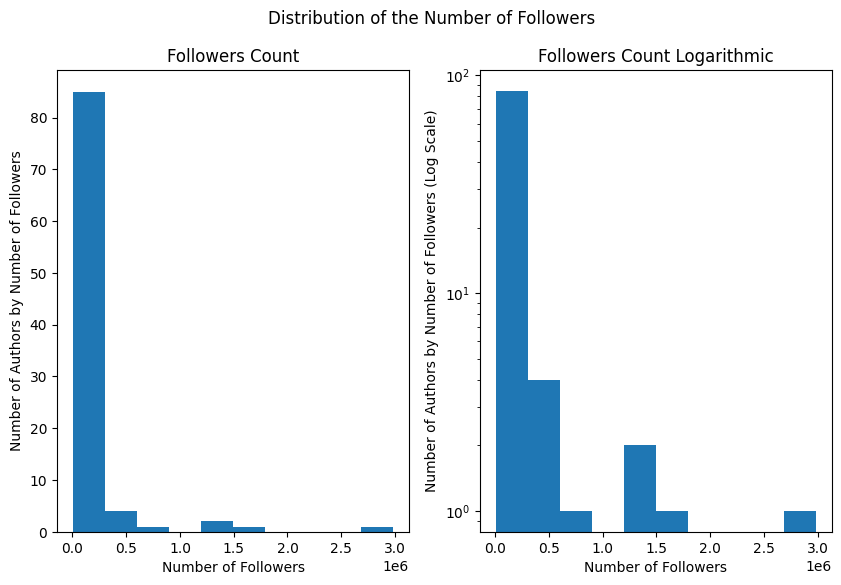

In [17]:
# Distribution of the number of followers
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig1.suptitle('Distribution of the Number of Followers')
# Original Followers Count
ax1.hist(dataset["public_metrics.followers_count"])
ax1.set_title("Followers Count")
ax1.set_xlabel("Number of Followers")
ax1.set_ylabel("Number of Authors by Number of Followers")
# Followers Count Logarithmic
ax2.hist(dataset["public_metrics.followers_count"])
ax2.set_title("Followers Count Logarithmic")
ax2.set_xlabel("Number of Followers")
ax2.set_ylabel("Number of Authors by Number of Followers (Log Scale)")
ax2.set_yscale("log")
plt.show()

Due to the nature of the dataset, the distribution is heavily skewed, making it difficult to interpret on a standard histogram. There is a clear pattern showing a significantly larger number of authors with few followers, while the number of authors decreases sharply as the follower count increases. This suggests a potentially exponential decline. By applying a logarithmic scale to the y-axis, the data becomes more interpretable, revealing a near-linear relationship that supports the hypothesis of an exponentially decreasing distribution.

## 3.2 Distribution of social impact

Repeat the above task but for the social impact of your users, also look at the logarithmic scale. Again, which one is more skewed?

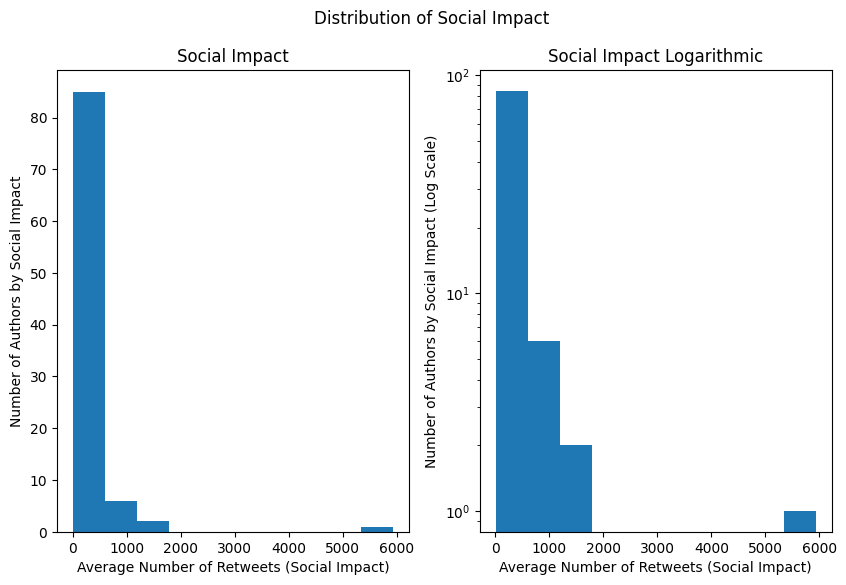

In [18]:
# Distribution of Average Number of Retweets (Social Impact)
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig2.suptitle('Distribution of Social Impact')
# Original Social Impact
ax1.hist(dataset["public_metrics.retweet_count"])
ax1.set_title("Social Impact")
ax1.set_xlabel("Average Number of Retweets (Social Impact)")
ax1.set_ylabel("Number of Authors by Social Impact")
# Social Impact Logarithmic
ax2.hist(dataset["public_metrics.retweet_count"])
ax2.set_title("Social Impact Logarithmic")
ax2.set_xlabel("Average Number of Retweets (Social Impact)")
ax2.set_ylabel("Number of Authors by Social Impact (Log Scale)")
ax2.set_yscale("log")
plt.show()

A similar pattern as before is observed for social impact, measured as the average number of retweets per author. The distribution is heavily skewed, with most authors having low social impact and a few having exceptionally high impact. Applying a logarithmic scale again reveals a near-linear relationship, suggesting an exponential decline.

## 3.3 Number of followers vs social impact
Create a scatter plot with the number of followers of each user on the x axis and the social impact of each user on the y axis. Both axis should be in logarithmic scale. Is there a relationship?  

Again you can use pandas [`scatter`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html) method with `logx` and `logy` set to true or you can use matplotlibs [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) method. Here you can use the `set_yscale` and `set_xscale` method of the axis to set them to `'log'`.

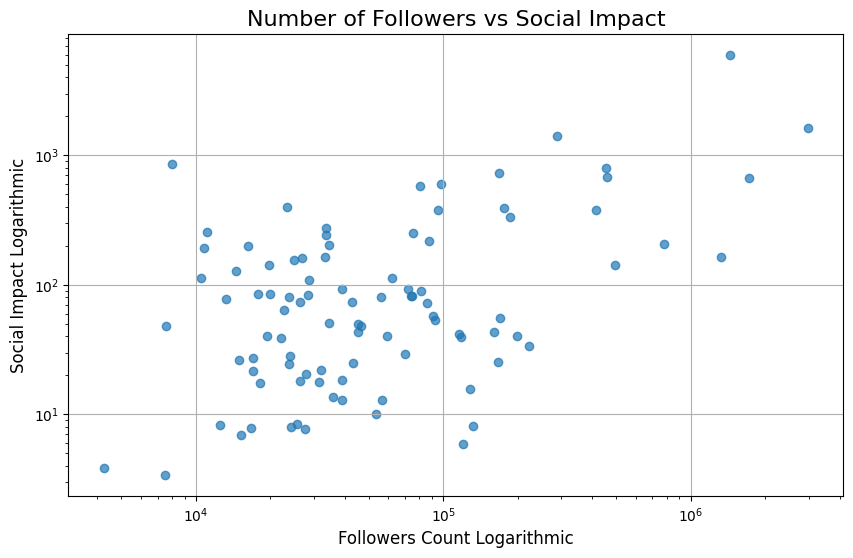

In [19]:
# Number of followers vs social impact
plt.figure(figsize=(10, 6))
plt.scatter(dataset["public_metrics.followers_count"], dataset["public_metrics.retweet_count"], alpha=0.7)
plt.title("Number of Followers vs Social Impact", fontsize=16)
plt.xlabel("Followers Count Logarithmic", fontsize=12)
plt.ylabel("Social Impact Logarithmic", fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.show()

# 4. Fit and visualize a regression model

## 4.1 Fit a linear model

First of all make two new columns on the data frame with the social impact and the follower count. One called `SI` with the logarithm of the amount of retweets, and another called `FC` with the logarithm of the amount of followers. For this you can use numpys log function `np.log(...)`.  

Now fit a linear regression model with sklearn. For this use the class [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to create a linear regression instance and then call the `fit` method. `SI` is used as the dependent variable (target) and `FC` as the independent variable (features).  

Print the model intercept and coefficient. For this you can use the models attributes `coef_` and `intercept_`.

In [20]:
# Add new Columns with logarithmic values 
dataset = dataset.assign(SI=np.log(dataset["public_metrics.retweet_count"]))
dataset = dataset.assign(FC=np.log(dataset["public_metrics.followers_count"]))
dataset

,id,username,public_metrics.followers_count,public_metrics.retweet_count,SI,FC
0,818472418620608512,RepAlLawsonJr,16996,27.175,3.302297,9.740733
1,236279233,NormaJTorres,80755,584.715,6.371125,11.299175
2,234014087,RepWilson,75264,252.995,5.533370,11.228757
3,18137749,ChrisVanHollen,197827,40.445,3.699943,12.195148
4,382791093,SenJohnHoeven,119640,5.940,1.781709,11.692243
...,...,...,...,...,...,...
89,2382685057,RepRobWoodall,17067,21.545,3.070144,9.744902
90,1083125649609506816,RepGregSteube,56133,81.255,4.397592,10.935479
91,1345787285179162624,RepHarshbarger,16215,199.010,5.293355,9.693692
92,942156122,RepSwalwell,1438408,5936.455,8.688867,14.179048


In [23]:
# Extract features and target from the dataset
features = dataset[["FC"]].values  # 2D array (required for features in scikit-learn)
target = dataset["SI"].values      # 1D array (sufficient for the target in scikit-learn)

# Create a linear regression model from the dataframe 
# with SI as the dependent variable and FC as the independent variable
reg = LinearRegression().fit(features, target)

# Get and print the results
reg_score = reg.score(features, target)       
reg_coef = reg.coef_[0]                       
reg_intercept = reg.intercept_                

print(f"R^2 Score (Model Performance): {reg_score:.3f}")        
print(f"Regression Coefficient (Slope): {reg_coef:.3f}")         
print(f"Regression Intercept: {reg_intercept:.3f}")

R^2 Score (Model Performance): 0.233
Regression Coefficient (Slope): 0.555
Regression Intercept: -1.801


The relationship between `Followers Count` and `Social Impact` remains weak even after logarithmic transformation, as shown by an $R^2$ of 0.233. 

- The moderate positive correlation \( Coefficient = 0.555 \) indicates that a higher follower count is associated with a higher social impact.  
- However, the model fails to explain most of the variance in `Social Impact`, suggesting that additional factors, such as engagement rates or follower activity, may be significant.  

The logarithmic transformation smooths the data but does not fully capture the complexity of the relationship.

## 4.2 Plot the results
Now plot the same scatter plot as in 3.3 additional add a line plot which shows the regression line of the model. For this use the intercept and the coefficient (slope). Does the line fit the data as you expected?  

It is easier to use matplotlib here to add the line plot to the scatter plot. For the line plot you can use matplotlibs [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) method. For the x values you can use numpy's [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace) method to evenly space x values in a certain range. The y values can be calculated with the intercept and the slope as follows:  
$
\begin{align}
    y = slope \cdot x + intercept
\end{align}
$

In [33]:
# Add library to check if regression line is correctly calculated
!pip install seaborn
import seaborn as sns

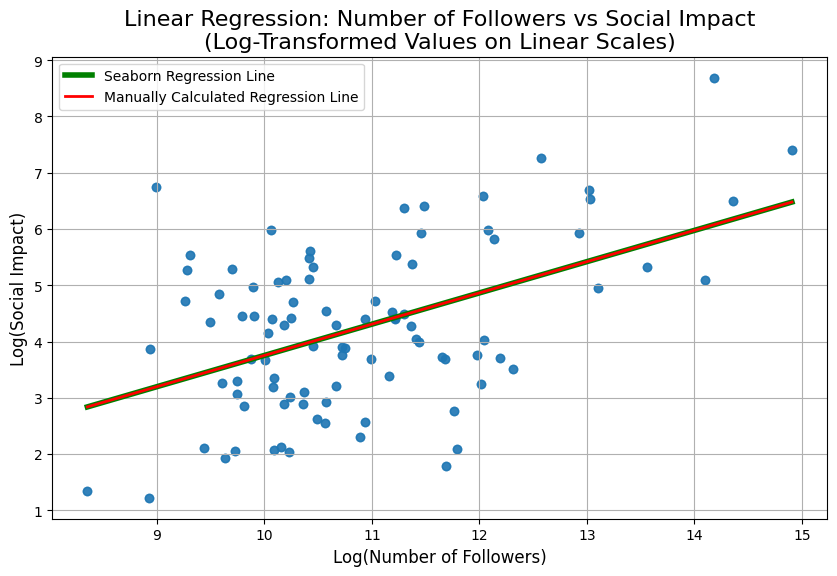

In [36]:
# Calculate values for regression line
xseq = np.linspace(dataset["FC"].min(), dataset["FC"].max(), num=100).reshape(-1, 1)
yseq = reg_coef * xseq.flatten() + reg_intercept  # logarithmic prediction

##################################################################
# Plot Linear Regression - Log-Transformed Values on Linear Scales
##################################################################

plt.figure(figsize=(10, 6))

# Scatter points
plt.scatter(dataset["FC"], dataset["SI"], alpha=0.7)

# Automatic regression line by seaborn
sns.regplot(
    x="FC", y="SI", data=dataset,
    scatter_kws={"alpha": 0.7},  
    line_kws={"color": "green", "linewidth": 4, "label": "Seaborn Regression Line"}, 
    ci=None  
)

# Manually calculated regression line
plt.plot(xseq, yseq, color="red", label="Manually Calculated Regression Line", linewidth=2)

plt.title("Linear Regression: Number of Followers vs Social Impact\n(Log-Transformed Values on Linear Scales)", fontsize=16)
plt.xlabel("Log(Number of Followers)", fontsize=12)
plt.ylabel("Log(Social Impact)", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

## 4.3 Calculate quality of the fit
Calculate the residuals of the model and save them in a vector. This can be done with following formula:
$
\begin{align}
residual = y_{true} - y_{pred}
\end{align}
$
where $y_{true}$ are the true values of the dependent variable (in our case `SI`) and $y_{pred}$ are the predicted values with the model. To get the predicted values of the model you can use the [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) method of the model.  

Afterwards calculate the variance of the residuals and the variance of the social impact variable. For this you can use numpy's [`var`](https://numpy.org/doc/stable/reference/generated/numpy.var.html) function. Is the variance of the residuals lower than the variance of the dependent variable? By how much in proportion?

In [45]:
# Predict the social impact using the model
prediction = reg.predict(features) 
# Calculate the residuals
residual = dataset["SI"] - prediction  # residual = y_true - y_pred

# Variance calculations
residual_variance = np.var(residual)  
dependent_variance = np.var(dataset["SI"]) 

# Proportion of variance explained
proportion_variance_explained = 1 - residual_variance / dependent_variance

# Print results
print(f"Variance of Residuals: {residual_variance:.3f}")
print(f"Variance of Social Impact (SI): {dependent_variance:.3f}")
print(f"Proportion of Variance Explained: {proportion_variance_explained:.3%}")

Variance of Residuals: 1.640
Variance of Social Impact (SI): 2.139
Proportion of Variance Explained: 23.309%


Yes, the variance of the residuals (1.640) is lower than the variance of the dependent variable (2.139).

The proportion of the variance explained by the model is approximately 23.31% (= $R^2$ score of 0.233), meaning the variance of the residuals is about 76.69% of the total variance in the dependent variable.

## 4.4 Distribution of residuals
Plot the histogram of residuals. Do they look normally distributted?  

Again you can use matplotlib as before to plot the histogram.

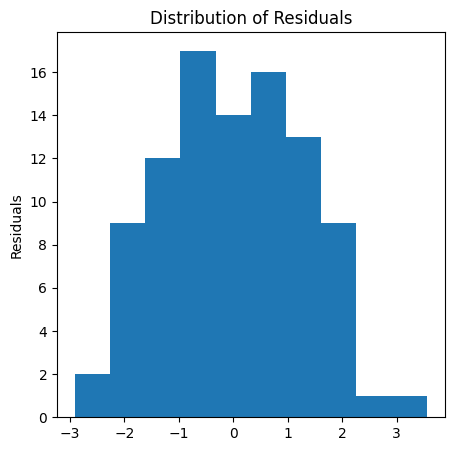

In [72]:
# plot histogram of residuals
plt.figure(figsize=(5,5))
plt.hist(residual) # Plot the residuals
plt.title("Distribution of Residuals")
plt.ylabel("Residuals")
plt.show()

The histogram shows an approximate normal distribution, but the deviations (missing peak at the center around 0, asymmetry, ...) suggest that the residuals are not perfectly normally distributed.

# 5. Bootstrapping

## 5.1 One sample
For bootsrapping we first look at creating one sample. For this use the follower and social impact dataframe from before and sample random rows with replacement. This again can be done with pandas [`sample`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) method and the keyword argument `replace` set to `True`.  

Fit a new linear regression model with this new dataset. What is the value of the coefficient and the intercept now?

In [54]:
sampled_users = dataset.sample(100, replace=True)
single_sample_bs_model = LinearRegression()
single_sample_bs_model.fit(sampled_users[["FC"]], sampled_users["SI"])
print(single_sample_bs_model.coef_, single_sample_bs_model.intercept_)

[0.55482782] -1.7899354660755344


The results from bootstrapping with a single sample (Coefficient: 0.5548, Intercept: -1.7899) are very close to the original values (0.555 and -1.801). This suggests that the original model is relatively stable and not heavily dependent on the selection of data.

## 5.2 Many bootstrap samples
Now repeat this 10000 times, save the resulting coefficient in a vector.

In [55]:
# Initialize lists to store coefficients
multi_sample_bs_model_coef = []
for i in range(10000):
    # resample the data
    temp_users = dataset.sample(100, replace=True)
    # fit the model
    temp_model = LinearRegression().fit(temp_users[["FC"]], temp_users["SI"])
    # append the coefficient to the multi_sample_bs_model_coef list
    multi_sample_bs_model_coef.append(temp_model.coef_)

multi_sample_bs_model_coef = np.array(multi_sample_bs_model_coef)

## 5.3 Bootstrap histogram

Plot a histogram of the values resulting from the permutations and add a vertical line on the value of the coefficient of the original model (from task 4.1). For adding a vertical line to the histogram in matplotlib you can use the [`axvline`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html) method.  

 How far is the line from the center of the histogram?

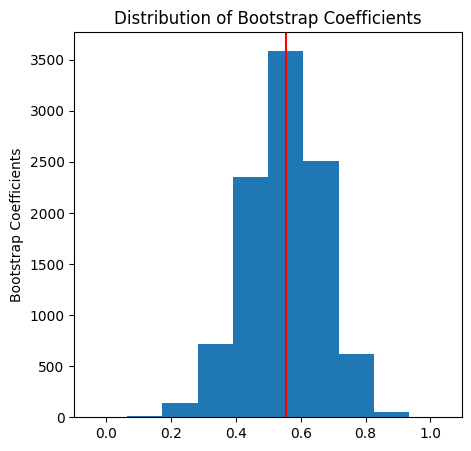

In [73]:
# plot histogram of bootstrap coefficients
fig, ax = plt.subplots(1, 1,  figsize=(5,5))
ax.hist(multi_sample_bs_model_coef) # Plot the multi_sample_bs_model_coef
ax.set_title("Distribution of Bootstrap Coefficients")
ax.set_ylabel("Bootstrap Coefficients")
# add vertical at original model coef
ax.axvline(reg.coef_, color="red")
plt.show()

In [69]:
# Calculate statistics
coef_min = multi_sample_bs_model_coef.min()
coef_max = multi_sample_bs_model_coef.max()
coef_mean = multi_sample_bs_model_coef.mean()
center_histogram = (coef_max - coef_min) / 2 
distance_from_mean = reg.coef_[0] - coef_mean
distance_from_center = reg.coef_[0] - center_histogram

# Print results
print(f"Original Coefficient: {reg.coef_[0]:.4f}")
print(f"Mean Bootstrap Coefficient: {coef_mean:.4f}")
print(f"Center of Histogramm: {center_histogram:.4f}")
print(f"Minimum Bootstrap Coefficient: {coef_min:.4f}")
print(f"Maximum Bootstrap Coefficient: {coef_max:.4f}")
print(f"Distance from Mean: {distance_from_mean:.4f}")
print(f"Distance from Center: {distance_from_center:.4f}")

Original Coefficient: 0.5554
Mean Bootstrap Coefficient: 0.5496
Center of Histogramm: 0.5431
Minimum Bootstrap Coefficient: -0.0435
Maximum Bootstrap Coefficient: 1.0427
Distance from Mean: 0.0058
Distance from Center: 0.0123


The approximate normal distribution of the histogram of coefficients indicates that the linear regression results are stable and randomly distributed, without significant biases or outliers.

The fact that the original coefficient value (0.5554) lies exactly at the peak of the histogram shows that it is a good estimate of the "central" or "average" coefficient.

When considering the distance of the original coefficient from the center of the histogram, the original coefficient is only 0.0058 away from the mean of the bootstrap coefficients and 0.0123 away from the midpoint between the minimum and maximum values. This suggests that the original coefficient is not only close to the central tendency of the bootstrap distribution but also well within its range, further supporting the robustness of the regression model.

# To learn more
* Do you find any relationship between social impact and the amount of followers?
* How sure are you that it is larger than zero? How sure are you that it is lower than 1?
* Is the value of the relationship within the ranges predicted by Social Impact Theory?
* Under that relationship, if I have 1000 followers, how many more followers do I need to double my social impact?